# SSD 

## 0. Loading packages

In [14]:
# Importing Python and external packages


import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

import scipy
import scipy.io as sio
from scipy import signal
from scipy.signal import spectrogram, hann, butter, filtfilt, freqz
from scipy.stats import permutation_test

import seaborn as sns
import pingouin as pg
import itertools
from itertools import combinations
from statannotations.Annotator import Annotator

import openpyxl
from openpyxl import Workbook, load_workbook
import xlrd
import pickle
import json
import csv

#mne
import mne_bids
import mne
from mne.time_frequency import tfr_morlet 


# TODO: add README file: 
# pip install pingouin
# pip install statannotations
         


Set Path to load PyPerceive

In [2]:
#######################     USE THIS DIRECTORY FOR IMPORTING PYPERCEIVE REPO  #######################

# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
BetaSenSightLongterm_path = os.getcwd()
while BetaSenSightLongterm_path[-8:] != 'Research':
    BetaSenSightLongterm_path = os.path.dirname(BetaSenSightLongterm_path)

# directory to PyPerceive code folder
PyPerceive_path = os.path.join(BetaSenSightLongterm_path,'PyPerceive_Project', 'Code', 'PyPerceive', 'code')
sys.path.append(PyPerceive_path)

# # change directory to PyPerceive code path within BetaSenSightLongterm Repo
os.chdir(PyPerceive_path)
os.getcwd()

'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code'

Load PyPerceive

In [3]:
from PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)
import PerceiveImport.methods.load_rawfile as load_rawfile
import PerceiveImport.methods.find_folders as find_folders
import PerceiveImport.methods.metadata_helpers as metaHelpers


importlib.reload(main_class)
importlib.reload(session_class)
importlib.reload(task_class)
importlib.reload(condition_class)
importlib.reload(contact_class)
importlib.reload(metadata_class)
importlib.reload(modality_class)
importlib.reload(load_rawfile)
importlib.reload(find_folders)
importlib.reload(run_class)
importlib.reload(metaHelpers)

<module 'PerceiveImport.methods.metadata_helpers' from 'c:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\code\\PerceiveImport\\methods\\metadata_helpers.py'>

Load meet Toolbox from Gunnar

In [4]:
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'Longterm_beta_project','Code', 'meet')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\Code\\meet'

In [5]:
import meet as meet

Set Path back to BetaSenSightLongterm Repo

In [6]:
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'Longterm_beta_project','Code', 'BetaSenSightLongterm', 'code')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\Code\\BetaSenSightLongterm\\code'

Load analysis functions

In [7]:

# Processing
import analysis.BSSu_processing.BSSuPsd as BSSuPsd
import analysis.BSSu_processing.FastFourierPSD as FFpsd
import analysis.BSSu_processing.feats_ssd as feats_ssd
import analysis.BSSu_processing.BSSu_ssd as BSSu_ssd

# bipolar Channel Analysis
import analysis.BSSu_BIPanalyis.PowerSpectra_withinChannels_Plot as PowerSpectraChannels
import analysis.BSSu_BIPanalyis.PeakFrequencies_PSD as PeakFrequency_psd
import analysis.BSSu_BIPanalyis.BIP_channelGroups as BIP_channelGroups
import analysis.BSSu_BIPanalyis.BIP_perChannelAnalysis as BIP_perChannel


# monopolar Referencing
import analysis.BSSu_monopolarReferencing.MonoRef_JLB as MonoRefJLB
import analysis.BSSu_monopolarReferencing.GroupMonopolarPSD as groupMonopol

# Ranking Order
import analysis.BSSu_RankingOrder.HighestRankedChannelPSD as highestRank
import analysis.BSSu_RankingOrder.monopolPSDaverage_withinSubject as PSDaverageMonopol
import analysis.BSSu_RankingOrder.BIPchannelGroups_ranks as BIP_ranks
import analysis.BSSu_RankingOrder.Permutation_rankings as Permute_ranks


# Clinical stimulation parameters
import analysis.ClinicalStimulation.activeStimulationContacts as activeStimContacts

# utility functions
import analysis.utils.loadResults as loadResults
import analysis.utils.find_folders as find_folders
import analysis.utils.writeGroupDataframes as writeGroupDF

# import Classes
from analysis.classes import (metadataAnalysis_class, mainAnalysis_class, sessionAnalysis_class, 
                              channelAnalysis_class, featureAnalysis_class, frequencyBand_class)

# import mni coordinates
import analysis.MNI_coordinates.load_rotated_coordinates as load_mni


importlib.reload(BSSuPsd)
importlib.reload(MonoRefJLB)
importlib.reload(loadResults)
importlib.reload(highestRank)
importlib.reload(groupMonopol)
importlib.reload(PSDaverageMonopol)
importlib.reload(FFpsd)
importlib.reload(find_folders)
importlib.reload(metadataAnalysis_class)
importlib.reload(mainAnalysis_class)
importlib.reload(sessionAnalysis_class)
importlib.reload(channelAnalysis_class)
importlib.reload(featureAnalysis_class)
importlib.reload(frequencyBand_class)
importlib.reload(PeakFrequency_psd)
importlib.reload(PowerSpectraChannels)
importlib.reload(BIP_channelGroups)
importlib.reload(BIP_ranks)
importlib.reload(activeStimContacts)
importlib.reload(Permute_ranks)
importlib.reload(BIP_perChannel)
importlib.reload(load_mni)
importlib.reload(writeGroupDF)
importlib.reload(feats_ssd)
importlib.reload(BSSu_ssd)


<module 'analysis.BSSu_processing.BSSu_ssd' from 'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\Code\\BetaSenSightLongterm\\code\\analysis\\BSSu_processing\\BSSu_ssd.py'>

In [8]:
# load if you want to see complete Dataframes
pd.set_option("display.max_rows", None)

## 1. Load Example PyPerceive loaded BSSu (Time Domain)

In [38]:
example_data = main_class.PerceiveData(
    sub = "017", 
    incl_modalities=["survey"],
    incl_session = [ "postop", "fu3m", "fu12m", "fu18m"],
    incl_condition = ["m0s0"],
    incl_contact=["RingR", "SegmInterR", "SegmIntraR", "RingL", "SegmInterL", "SegmIntraL"],
    incl_task = ["rest"]
)



	### WARNING: NaNs in Metadata Table sub-017 ###
NaNs in: sub-017_ses-2021040709594199_run-CHRONIC20210404124649.mat
NaNs in: sub-017_ses-2021040809491499_run-CHRONIC20210407065701.mat
NaNs in: sub-017_ses-2021041212054199_run-CHRONIC20210408063010.mat
NaNs in: sub-017_ses-2021041410364999_run-CHRONIC20210412103008.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414104500.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414104900.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414105100.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414105600.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414105900.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110100.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110400.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110700.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110800.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414111200.mat
NaNs in: sub-017_ses-2021041410364999_run-IS2021

In [45]:
timedomain_data = example_data.survey.fu12m.m0s0.rest.SegmIntraR.run1.data

In [46]:
ch_names = timedomain_data.ch_names
ch_names#[3:6]

['LFP_R_1A2A_STN', 'LFP_R_1B2B_STN', 'LFP_R_1C2C_STN']

In [44]:

chan_short = []

for c, chan in enumerate(ch_names):
    bipolarChannel = chan.split("_")
    recording_montage = bipolarChannel[2] 
    chan_short.append(recording_montage)

chan_short

['1A2A', '1B2B', '1C2C']

In [45]:
data = timedomain_data.get_data()
data

array([[ 2.59517924,  3.9491858 ,  4.5133552 , ...,  1.80534208,
         2.36951148,  1.80534208],
       [-7.14055486, -2.72021138,  2.4935271 , ...,  6.34715988,
         3.28692208,  0.45336856],
       [10.4746601 ,  8.88069008,  7.28672007, ...,  2.27710002,
         1.36626001,  1.70782502],
       [-1.10845618,  1.10845618,  4.21213347, ...,  4.54467033,
         1.55183865,  0.77591932],
       [12.35429333,  8.72734483,  5.78044918, ..., -1.70013211,
        -0.68005284, -1.70013211],
       [-5.16718724, -3.9315555 , -3.25757456, ...,  0.56165079,
         1.79728252,  0.89864126]])

In [18]:
Ring_2Darray = data[[3,4,5], :]

## 2. Tutorial to use Jeroen's function get_SSD_component with meet Toolbox (Gunnar)

In [ ]:
# loop over windows 
for i_w, win_dat in enumerate(windows.data[:5]): 
    win_dat = win_dat.astype(np.float64) 

    # select only rows without missing 
    nan_rows = np.array([pd.isna(win_dat[:, i]).any() for i in range(win_dat.shape[-1])]) 
    win_dat = win_dat[:, ~nan_rows] # HAS TO 2D ARRAY WITHOUT MISSING VALUES! 
    win_chnames = list(compress(windows.keys, ~nan_rows)) 
    win_time = windows.win_starttimes[i_w] 
    
    # loop over defined frequency bands 
    for bw in SETTINGS['SPECTRAL_BANDS']: 
        f_range = SETTINGS['SPECTRAL_BANDS'][bw] 
        
        # check whether to perform SSD 
        if SETTINGS['FEATS_INCL']['SSD']: 
            (ssd_filt_data, ssd_pattern, ssd_eigvals 
             ) = ssd.get_SSD_component( 
                data_2d=win_dat.T, 
                fband_interest=f_range, 
                s_rate=windows.fs, 
                use_freqBand_filtered=True, 
                return_comp_n=0, ) 
            
            f, psd = signal.welch(ssd_filt_data, axis=-1, nperseg=windows.fs, fs=windows.fs) 
            
            plt.plot(f, psd, label=bw) 

            
plt.xlim(0, 100) 
plt.title(f'WINDOW # {i_w} - {dType.upper()}') 
plt.legend() 
plt.close()

(0.0, 100.0)

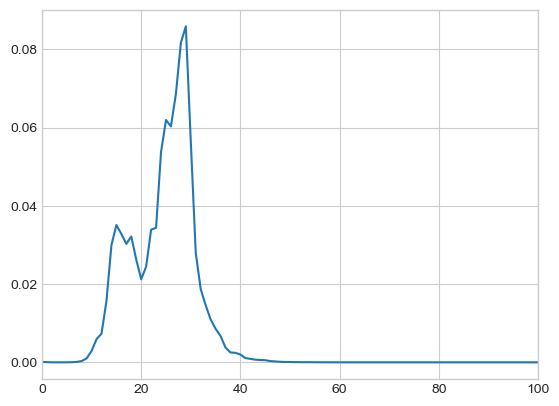

In [49]:
f_range = 13, 35
sfreq = timedomain_data.info["sfreq"]


(ssd_filt_data, ssd_pattern, ssd_eigvals 
             ) = feats_ssd.get_SSD_component( 
                data_2d=data, 
                fband_interest=f_range, 
                s_rate=sfreq, 
                use_freqBand_filtered=True, 
                return_comp_n=0, ) 
            
f, psd = signal.welch(ssd_filt_data, axis=-1, nperseg=sfreq, fs=sfreq) 
            
plt.plot(f, psd) 

            
plt.xlim(0, 100) 
#plt.title(f'WINDOW # {i_w} - {dType.upper()}') 
#plt.legend() 
#plt.close()

In [47]:
ssd_pattern[0]

array([ 0.22758259,  0.92782483,  0.3373792 ,  1.        , -0.73676945,
       -0.12540873])

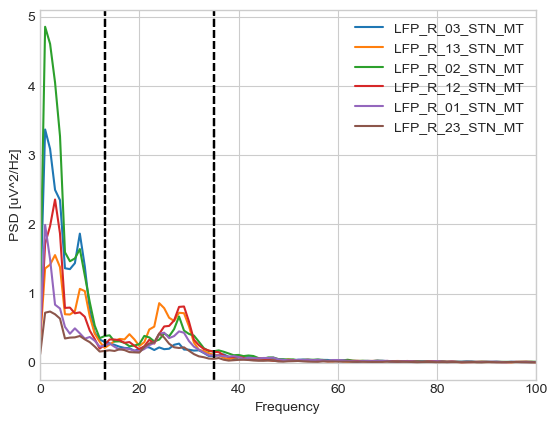

In [81]:
ch_names = timedomain_data.ch_names
data = timedomain_data.get_data()

# plot the PSD channels in a recording group

for c, chan in enumerate(ch_names):

    f, psd = signal.welch(data[c], axis=-1, nperseg=sfreq, fs=sfreq) 

    plt.plot(f, psd, label=chan)            
    plt.xlim(0, 100) 
    plt.xlabel("Frequency")
    plt.ylabel("PSD [uV^2/Hz]")
    plt.axvline(x=13, color='black', linestyle='--')
    plt.axvline(x=35, color='black', linestyle='--')
    plt.legend()
    
    

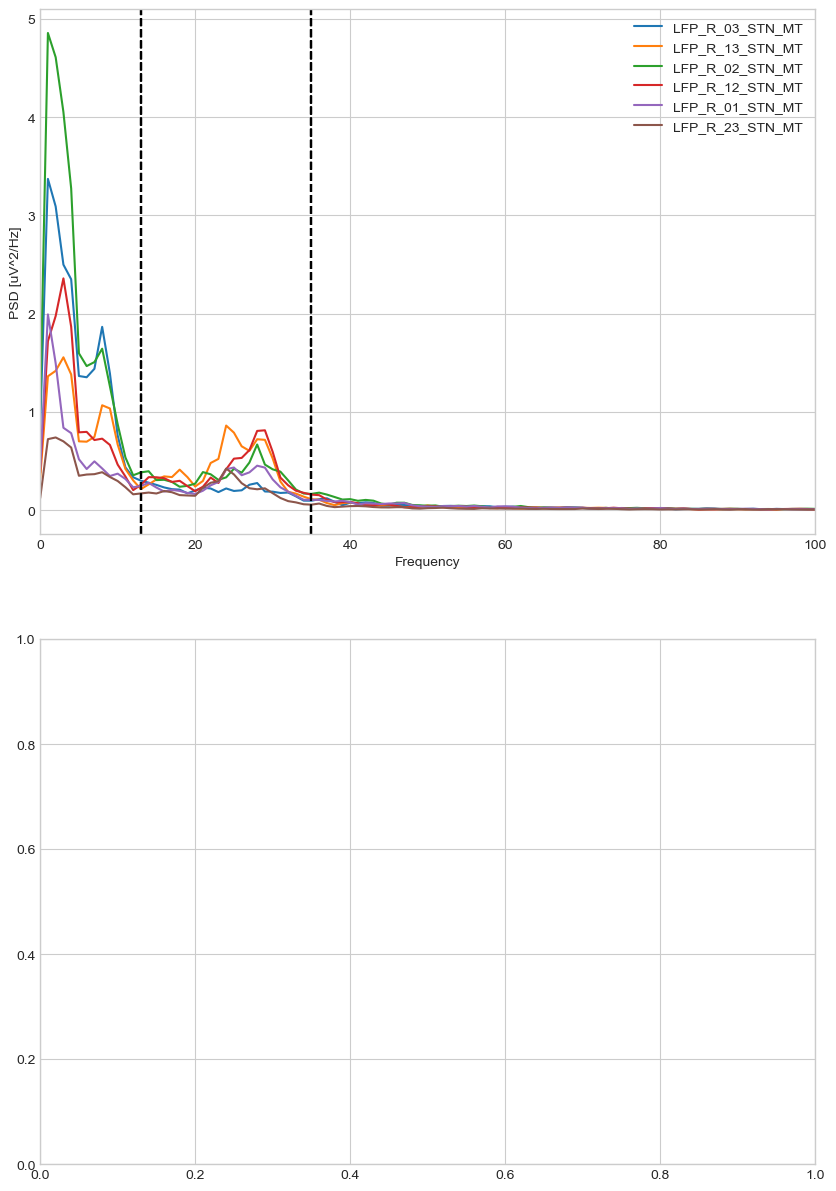

In [82]:
fig, axes = plt.subplots(2, 1, figsize=(10,15))

ch_names = timedomain_data.ch_names
data = timedomain_data.get_data()

# plot the PSD channels in a recording group

for c, chan in enumerate(ch_names):

    f, psd = signal.welch(data[c], axis=-1, nperseg=sfreq, fs=sfreq) 

    axes[0].plot(f, psd, label=chan)            
    axes[0].set_xlim(0, 100) 
    axes[0].set_xlabel("Frequency")
    axes[0].set_ylabel("PSD [uV^2/Hz]")
    axes[0].axvline(x=13, color='black', linestyle='--')
    axes[0].axvline(x=35, color='black', linestyle='--')
    axes[0].legend()
    

## 3. Automatize a function calculating and writing Dataframes after applying SSD
- weights of all bipolar channels 
- weights of different recording montage groups (Ring, SegmInter, SegmIntra)

write Dataframe with SSD filtered weights for each montage groups seperately

In [50]:
writtenDataframe = writeGroupDF.write_SSD_filtered_groupChannels(
    incl_sub=["017", "019", "021", "024", "025", "026", "028", "029", "030", "031", "032", "033", "038"],
    f_band="lowBeta"
)


	### WARNING: NaNs in Metadata Table sub-017 ###
NaNs in: sub-017_ses-2021040709594199_run-CHRONIC20210404124649.mat
NaNs in: sub-017_ses-2021040809491499_run-CHRONIC20210407065701.mat
NaNs in: sub-017_ses-2021041212054199_run-CHRONIC20210408063010.mat
NaNs in: sub-017_ses-2021041410364999_run-CHRONIC20210412103008.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414104500.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414104900.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414105100.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414105600.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414105900.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110100.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110400.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110700.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110800.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414111200.mat
NaNs in: sub-017_ses-2021041410364999_run-IS2021

In [10]:
loaded_ssd_result = loadResults.load_SSD_results_pickle(f_band="Beta")
loaded_ssd_result

pickle file loaded:  SSD_results_Dataframe_Beta.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results


,subject,hemisphere,session,recording_group,bipolarChannel,ssd_filtered_timedomain,ssd_pattern,ssd_eigvals
017_Right_fu3m_LFP_R_12_STN_MT,017,Right,fu3m,RingR,12,"[-0.0418909072384, -0.8479430804553855, -1.238...",-0.872632,0.901847
017_Right_fu3m_LFP_R_01_STN_MT,017,Right,fu3m,RingR,01,"[-0.0418909072384, -0.8479430804553855, -1.238...",-0.213996,0.792729
017_Right_fu3m_LFP_R_23_STN_MT,017,Right,fu3m,RingR,23,"[-0.0418909072384, -0.8479430804553855, -1.238...",1.0,0.649734
017_Right_fu3m_LFP_R_1A1B_STN_MT,017,Right,fu3m,SegmIntraR,1A1B,"[-0.09952216387371969, -1.2380238972337754, -2...",0.029354,0.89082
017_Right_fu3m_LFP_R_1B1C_STN_MT,017,Right,fu3m,SegmIntraR,1B1C,"[-0.09952216387371969, -1.2380238972337754, -2...",-0.241398,0.840307
...,...,...,...,...,...,...,...,...
038_Left_fu3m_LFP_L_2B2C_STN_MT,038,Left,fu3m,SegmIntraL,2B2C,"[0.03864237345034142, -0.25534729218288954, -0...",-0.000054,0.789974
038_Left_fu3m_LFP_L_2A2C_STN_MT,038,Left,fu3m,SegmIntraL,2A2C,"[0.03864237345034142, -0.25534729218288954, -0...",0.20553,0.753945
038_Left_fu3m_LFP_L_1A2A_STN_MT,038,Left,fu3m,SegmInterL,1A2A,"[0.015277493370720955, 0.052832819667909856, -...",0.33295,0.926278
038_Left_fu3m_LFP_L_1B2B_STN_MT,038,Left,fu3m,SegmInterL,1B2B,"[0.015277493370720955, 0.052832819667909856, -...",1.0,0.828405


Write Dataframe of SSD filtered signals of different channel groups + PLOT Power Spectra and first component Spectrum

In [58]:
SSD_results = BSSu_ssd.SSD_filter_groupChannels(
    incl_sub=["017", "019", "021", "024", "025", "026", "028", "029", "030", "031", "032", "033", "038"],
    f_band="highBeta"
)




	### WARNING: NaNs in Metadata Table sub-017 ###
NaNs in: sub-017_ses-2021040709594199_run-CHRONIC20210404124649.mat
NaNs in: sub-017_ses-2021040809491499_run-CHRONIC20210407065701.mat
NaNs in: sub-017_ses-2021041212054199_run-CHRONIC20210408063010.mat
NaNs in: sub-017_ses-2021041410364999_run-CHRONIC20210412103008.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414104500.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414104900.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414105100.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414105600.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414105900.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110100.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110400.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110700.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110800.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414111200.mat
NaNs in: sub-017_ses-2021041410364999_run-IS2021

In [57]:
SSD_results

,subject,hemisphere,session,recording_group,bipolarChannel,ssd_filtered_timedomain,ssd_pattern,ssd_eigvals
017_Right_fu3m_LFP_R_12_STN_MT,017,Right,fu3m,RingR,12,"[0.0740813165809722, 0.03252178023635091, -0.0...",0.227556,0.571877
017_Right_fu3m_LFP_R_01_STN_MT,017,Right,fu3m,RingR,01,"[0.0740813165809722, 0.03252178023635091, -0.0...",0.213628,0.394021
017_Right_fu3m_LFP_R_23_STN_MT,017,Right,fu3m,RingR,23,"[0.0740813165809722, 0.03252178023635091, -0.0...",-1.0,0.361359
017_Right_fu3m_LFP_R_1A1B_STN_MT,017,Right,fu3m,SegmIntraR,1A1B,"[-0.07492841261921221, -0.41712103678045953, -...",-0.173507,0.596825
017_Right_fu3m_LFP_R_1B1C_STN_MT,017,Right,fu3m,SegmIntraR,1B1C,"[-0.07492841261921221, -0.41712103678045953, -...",-1.0,0.582376
017_Right_fu3m_LFP_R_1A1C_STN_MT,017,Right,fu3m,SegmIntraR,1A1C,"[-0.07492841261921221, -0.41712103678045953, -...",-0.279721,0.524522
017_Right_fu3m_LFP_R_2A2B_STN_MT,017,Right,fu3m,SegmIntraR,2A2B,"[-0.07492841261921221, -0.41712103678045953, -...",-0.368027,0.469533
017_Right_fu3m_LFP_R_2B2C_STN_MT,017,Right,fu3m,SegmIntraR,2B2C,"[-0.07492841261921221, -0.41712103678045953, -...",-0.346767,0.416702
017_Right_fu3m_LFP_R_2A2C_STN_MT,017,Right,fu3m,SegmIntraR,2A2C,"[-0.07492841261921221, -0.41712103678045953, -...",-0.123603,0.366381
017_Right_fu3m_LFP_R_1A2A_STN_MT,017,Right,fu3m,SegmInterR,1A2A,"[-0.1346121072471849, 0.3170645223512361, 0.65...",0.306009,0.568691


In [ ]:
# load the PSD data with classes
incl_sub = ["017", "019", "021", "024", "025", "026", "028", "029", "030", "031", "032", "033", "038"]
hemisphere =["Right", "Left"]
signalFilter="unfiltered"
incl_session=["postop", "fu3m", "fu12m", "fu18m"]
incl_cond=["m0s0"]
Ring = ['BIP_03', 'BIP_02', 'BIP_13', 'BIP_12', 'BIP_01', 'BIP_23']
SegmIntra = ['BIP_1A1B', 'BIP_1B1C', 'BIP_1A1C', 'BIP_2A2B', 'BIP_2B2C', 'BIP_2A2C']
SegmInter = ['BIP_1A2A', 'BIP_1B2B', 'BIP_1C2C']

f_range = 13, 35

incl_contact={}
rec_group_input_array={}
SSD_results_storage = {}

for sub in incl_sub:

    sub_results_path = find_folders.get_local_path(folder="figures", sub=sub) 

    for hem in hemisphere:
        if hem == "Right":
            incl_contact["Right"] = ["RingR", "SegmIntraR", "SegmInterR"]

        elif hem == "Left":
            incl_contact["Left"] = ["RingL", "SegmIntraL", "SegmInterL"]

        mainclass_sub = main_class.PerceiveData(
            sub = sub, 
            incl_modalities= ["survey"],
            incl_session = incl_session,
            incl_condition = incl_cond,
            incl_task = ["rest"],
            incl_contact=incl_contact[f"{hem}"]
            )

        for ses in incl_session:
            for cond in incl_cond:
                for recording_group in incl_contact[f"{hem}"]:

                    # check if session exists 
                    try: 
                        getattr(mainclass_sub.survey, ses)
                    except AttributeError:
                        continue

                    timedomain_data = getattr(mainclass_sub.survey, ses)
                    

                    # check if condition exists
                    try:
                        getattr(timedomain_data, cond)
                    except AttributeError:
                        continue

                    timedomain_data = getattr(timedomain_data, cond)
                    timedomain_data = getattr(timedomain_data.rest, recording_group) # for each rec group in incl_contact
                    timedomain_data = timedomain_data.run1.data

                    ch_names = timedomain_data.ch_names
                    sfreq = timedomain_data.info["sfreq"]

                    rec_group_data = timedomain_data.get_data() # 2D array of all rec channels in a rec group
                    rec_group_input_array[f"{sub}_{hem}_{ses}_{cond}_{recording_group}"] = rec_group_data


                    # fig, axes = plt.subplots(2, 1, figsize=(10,15))
                    
                    # # plot the PSD channels in a recording group
                    # for c, chan in enumerate(ch_names):

                    #     f_raw, psd_raw = signal.welch(rec_group_data[c], axis=-1, nperseg=sfreq, fs=sfreq) 

                    #     axes[0].plot(f_raw, psd_raw, label=chan)        
                    #     axes[0].set_title(f'Power Spectra {recording_group}: sub{sub} {hem} hemisphere, {ses}')
                    #     axes[0].set_xlim(0, 100) 
                    #     axes[0].set_xlabel("Frequency")
                    #     axes[0].set_ylabel("PSD [uV^2/Hz]")
                    #     axes[0].axvline(x=13, color='black', linestyle='--')
                    #     axes[0].axvline(x=35, color='black', linestyle='--')
                    #     axes[0].legend()


                    # apply SSD filter on time domain of each recording group
                    (ssd_filt_data, ssd_pattern, ssd_eigvals 
                                ) = feats_ssd.get_SSD_component( 
                                    data_2d=rec_group_data, 
                                    fband_interest=f_range, 
                                    s_rate=sfreq, 
                                    use_freqBand_filtered=True, 
                                    return_comp_n=0, ) 
                    
                    # store SSD outcome in Dataframe
                    for c, chan in enumerate(ch_names):
                        SSD_results_storage[f"{sub}_{hem}_{ses}_{chan}"] = [sub, hem, ses, recording_group, chan, ssd_filt_data, ssd_pattern[0][c], ssd_eigvals[c]]

                    # use Welch to transform the time domain data to frequency domain data            
                    f, psd = signal.welch(ssd_filt_data, axis=-1, nperseg=sfreq, fs=sfreq) # ssd_filt_data is only one array with the PSD of the FIRST component
                    

                    # plot the first component Power spectrum of each recording group
                    # axes[1].plot(f, psd) 
                                
                    # axes[1].set_xlim(0, 100)   
                    # axes[1].set_xlabel("Frequency")
                    # axes[1].set_title(f'Power Spectrum of first component: sub{sub} {hem} hemisphere, {ses}, {recording_group}') 
                    # axes[1].axvline(x=13, color='black', linestyle='--')
                    # axes[1].axvline(x=35, color='black', linestyle='--')

                    # fig.savefig(sub_results_path + f"\\sub-{sub}_{hem}_SSD_firstComponent_PowerSpectrum_{ses}_{recording_group}")

                   

SSD_results_Dataframe = pd.DataFrame(SSD_results_storage)
SSD_results_Dataframe.rename(index={0:"subject", 1:"hemisphere", 2:"session", 3:"recording_group", 4:"bipolarChannel", 5:"ssd_filtered_timedomain", 6:"ssd_pattern", 7:"ssd_eigvals"}, inplace=True)
SSD_results_Dataframe = SSD_results_Dataframe.transpose()


        

In [61]:
example_data.survey.fu3m.m0s0.rest.RingR.run1.data

<RawArray | 6 x 5288 (21.1 s), ~259 kB, data loaded>

In [85]:
SSD_results_Dataframe

,subject,hemisphere,session,recording_group,bipolarChannel,ssd_filtered_timedomain,ssd_pattern,ssd_eigvals
017_Right_fu3m_LFP_R_03_STN_MT,017,Right,fu3m,RingR,LFP_R_03_STN_MT,"[0.032600785035807434, 0.7626753251134801, 1.1...","[0.049633312649387556, -0.11807269603846558, 1...",0.904594
017_Right_fu3m_LFP_R_13_STN_MT,017,Right,fu3m,RingR,LFP_R_13_STN_MT,"[0.032600785035807434, 0.7626753251134801, 1.1...","[-0.6976578114138412, -1.0, -0.053549634023087...",0.832452
017_Right_fu3m_LFP_R_02_STN_MT,017,Right,fu3m,RingR,LFP_R_02_STN_MT,"[0.032600785035807434, 0.7626753251134801, 1.1...","[0.11941976453875561, 1.0, 0.4835446327298178,...",0.814931
017_Right_fu3m_LFP_R_12_STN_MT,017,Right,fu3m,RingR,LFP_R_12_STN_MT,"[0.032600785035807434, 0.7626753251134801, 1.1...","[-0.1577970189024648, 0.3892758161742464, -0.5...",0.791301
017_Right_fu3m_LFP_R_01_STN_MT,017,Right,fu3m,RingR,LFP_R_01_STN_MT,"[0.032600785035807434, 0.7626753251134801, 1.1...","[0.7412484930803367, 1.0, 0.41054062958764065,...",0.785849
...,...,...,...,...,...,...,...,...
038_Left_fu3m_LFP_L_2B2C_STN_MT,038,Left,fu3m,SegmIntraL,LFP_L_2B2C_STN_MT,"[0.03864237345034142, -0.25534729218288954, -0...","[-0.9909773157082497, -1.0, -0.671864658432917...",0.789974
038_Left_fu3m_LFP_L_2A2C_STN_MT,038,Left,fu3m,SegmIntraL,LFP_L_2A2C_STN_MT,"[0.03864237345034142, -0.25534729218288954, -0...","[-0.413394721776951, -0.5497875590907301, -1.0...",0.753945
038_Left_fu3m_LFP_L_1A2A_STN_MT,038,Left,fu3m,SegmInterL,LFP_L_1A2A_STN_MT,"[0.015277493370720955, 0.052832819667909856, -...","[0.3329504197102434, 1.0, 0.4598411306516709]",0.926278
038_Left_fu3m_LFP_L_1B2B_STN_MT,038,Left,fu3m,SegmInterL,LFP_L_1B2B_STN_MT,"[0.015277493370720955, 0.052832819667909856, -...","[-1.0, 0.06634172126279622, -0.24626902957366567]",0.828405


In [ ]:
Ring_2Darray = data[[3,4,5], :]

In [73]:
data_keys = list(rec_group_input_array.keys())
data_keys

['017_Right_fu3m_m0s0_RingR',
 '017_Right_fu3m_m0s0_SegmIntraR',
 '017_Right_fu3m_m0s0_SegmInterR',
 '017_Right_fu12m_m0s0_RingR',
 '017_Right_fu12m_m0s0_SegmIntraR',
 '017_Right_fu12m_m0s0_SegmInterR',
 '017_Left_fu3m_m0s0_RingL',
 '017_Left_fu3m_m0s0_SegmIntraL',
 '017_Left_fu3m_m0s0_SegmInterL',
 '017_Left_fu12m_m0s0_RingL',
 '017_Left_fu12m_m0s0_SegmIntraL',
 '017_Left_fu12m_m0s0_SegmInterL',
 '019_Right_fu3m_m0s0_RingR',
 '019_Right_fu3m_m0s0_SegmIntraR',
 '019_Right_fu3m_m0s0_SegmInterR',
 '019_Right_fu12m_m0s0_RingR',
 '019_Right_fu12m_m0s0_SegmIntraR',
 '019_Right_fu12m_m0s0_SegmInterR',
 '019_Right_fu18m_m0s0_RingR',
 '019_Right_fu18m_m0s0_SegmIntraR',
 '019_Right_fu18m_m0s0_SegmInterR',
 '019_Left_fu3m_m0s0_RingL',
 '019_Left_fu3m_m0s0_SegmIntraL',
 '019_Left_fu3m_m0s0_SegmInterL',
 '019_Left_fu12m_m0s0_RingL',
 '019_Left_fu12m_m0s0_SegmIntraL',
 '019_Left_fu12m_m0s0_SegmInterL',
 '019_Left_fu18m_m0s0_RingL',
 '019_Left_fu18m_m0s0_SegmIntraL',
 '019_Left_fu18m_m0s0_SegmInterL

## 4. Analyze within each channel group the development of weights over time

In [32]:
loaded_ssd_result = loadResults.load_SSD_results_pickle(f_band="Beta")
loaded_ssd_result

pickle file loaded:  SSD_results_Dataframe_Beta.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results


,subject,hemisphere,session,recording_group,bipolarChannel,ssd_filtered_timedomain,ssd_pattern,ssd_eigvals
017_Right_fu3m_LFP_R_12_STN_MT,017,Right,fu3m,RingR,12,"[-0.0418909072384, -0.8479430804553855, -1.238...",-0.872632,0.901847
017_Right_fu3m_LFP_R_01_STN_MT,017,Right,fu3m,RingR,01,"[-0.0418909072384, -0.8479430804553855, -1.238...",-0.213996,0.792729
017_Right_fu3m_LFP_R_23_STN_MT,017,Right,fu3m,RingR,23,"[-0.0418909072384, -0.8479430804553855, -1.238...",1.0,0.649734
017_Right_fu3m_LFP_R_1A1B_STN_MT,017,Right,fu3m,SegmIntraR,1A1B,"[-0.09952216387371969, -1.2380238972337754, -2...",0.029354,0.89082
017_Right_fu3m_LFP_R_1B1C_STN_MT,017,Right,fu3m,SegmIntraR,1B1C,"[-0.09952216387371969, -1.2380238972337754, -2...",-0.241398,0.840307
...,...,...,...,...,...,...,...,...
038_Left_fu3m_LFP_L_2B2C_STN_MT,038,Left,fu3m,SegmIntraL,2B2C,"[0.03864237345034142, -0.25534729218288954, -0...",-0.000054,0.789974
038_Left_fu3m_LFP_L_2A2C_STN_MT,038,Left,fu3m,SegmIntraL,2A2C,"[0.03864237345034142, -0.25534729218288954, -0...",0.20553,0.753945
038_Left_fu3m_LFP_L_1A2A_STN_MT,038,Left,fu3m,SegmInterL,1A2A,"[0.015277493370720955, 0.052832819667909856, -...",0.33295,0.926278
038_Left_fu3m_LFP_L_1B2B_STN_MT,038,Left,fu3m,SegmInterL,1B2B,"[0.015277493370720955, 0.052832819667909856, -...",1.0,0.828405


Perform Permutation Test from scipy.stats import permutation_test 

In [33]:
# subject hemisphere aggragate to one column

loaded_ssd_result["subject_hemisphere"] = loaded_ssd_result[["subject", "hemisphere", "bipolarChannel"]].agg("_".join, axis=1)
loaded_ssd_result.drop(columns=["subject", "hemisphere", "bipolarChannel"], inplace=True)
loaded_ssd_result

,session,recording_group,ssd_filtered_timedomain,ssd_pattern,ssd_eigvals,subject_hemisphere
017_Right_fu3m_LFP_R_12_STN_MT,fu3m,RingR,"[-0.0418909072384, -0.8479430804553855, -1.238...",-0.872632,0.901847,017_Right_12
017_Right_fu3m_LFP_R_01_STN_MT,fu3m,RingR,"[-0.0418909072384, -0.8479430804553855, -1.238...",-0.213996,0.792729,017_Right_01
017_Right_fu3m_LFP_R_23_STN_MT,fu3m,RingR,"[-0.0418909072384, -0.8479430804553855, -1.238...",1.0,0.649734,017_Right_23
017_Right_fu3m_LFP_R_1A1B_STN_MT,fu3m,SegmIntraR,"[-0.09952216387371969, -1.2380238972337754, -2...",0.029354,0.89082,017_Right_1A1B
017_Right_fu3m_LFP_R_1B1C_STN_MT,fu3m,SegmIntraR,"[-0.09952216387371969, -1.2380238972337754, -2...",-0.241398,0.840307,017_Right_1B1C
...,...,...,...,...,...,...
038_Left_fu3m_LFP_L_2B2C_STN_MT,fu3m,SegmIntraL,"[0.03864237345034142, -0.25534729218288954, -0...",-0.000054,0.789974,038_Left_2B2C
038_Left_fu3m_LFP_L_2A2C_STN_MT,fu3m,SegmIntraL,"[0.03864237345034142, -0.25534729218288954, -0...",0.20553,0.753945,038_Left_2A2C
038_Left_fu3m_LFP_L_1A2A_STN_MT,fu3m,SegmInterL,"[0.015277493370720955, 0.052832819667909856, -...",0.33295,0.926278,038_Left_1A2A
038_Left_fu3m_LFP_L_1B2B_STN_MT,fu3m,SegmInterL,"[0.015277493370720955, 0.052832819667909856, -...",1.0,0.828405,038_Left_1B2B


In [19]:
# get Data of each channel group and create different groups per session

# select rows if Ring isin recording_group

Ring_group = ["RingR", "RingL"]
SegmInter_group = ["SegmInterR", "SegmInterL"]
SegmIntra_group = ["SegmIntraR", "SegmIntraL"]

Ring_data = loaded_ssd_result.loc[(loaded_ssd_result["recording_group"].isin(Ring_group))]
SegmInter_data = loaded_ssd_result.loc[(loaded_ssd_result["recording_group"].isin(SegmInter_group))]
SegmIntra_data = loaded_ssd_result.loc[(loaded_ssd_result["recording_group"].isin(SegmIntra_group))]



,session,recording_group,bipolarChannel,ssd_filtered_timedomain,ssd_pattern,ssd_eigvals,subject_hemisphere
017_Right_fu3m_LFP_R_1A2A_STN_MT,fu3m,SegmInterR,1A2A,"[-0.0814305720309305, 0.20661286529413897, 0.5...",-1.0,0.834739,017_Right
017_Right_fu3m_LFP_R_1B2B_STN_MT,fu3m,SegmInterR,1B2B,"[-0.0814305720309305, 0.20661286529413897, 0.5...",-0.73892,0.817409,017_Right
017_Right_fu3m_LFP_R_1C2C_STN_MT,fu3m,SegmInterR,1C2C,"[-0.0814305720309305, 0.20661286529413897, 0.5...",-0.325,0.755167,017_Right
017_Right_fu12m_LFP_R_1A2A_STN,fu12m,SegmInterR,1A2A,"[0.021052015000057708, 0.10553247674722971, 0....",1.0,0.795757,017_Right
017_Right_fu12m_LFP_R_1B2B_STN,fu12m,SegmInterR,1B2B,"[0.021052015000057708, 0.10553247674722971, 0....",0.534543,0.744245,017_Right
...,...,...,...,...,...,...,...
038_Left_postop_LFP_L_1B2B_STN_MT,postop,SegmInterL,1B2B,"[-0.01886512704168981, -0.019108599272464864, ...",1.0,0.798822,038_Left
038_Left_postop_LFP_L_1C2C_STN_MT,postop,SegmInterL,1C2C,"[-0.01886512704168981, -0.019108599272464864, ...",0.545084,0.69212,038_Left
038_Left_fu3m_LFP_L_1A2A_STN_MT,fu3m,SegmInterL,1A2A,"[0.015277493370720955, 0.052832819667909856, -...",0.33295,0.926278,038_Left
038_Left_fu3m_LFP_L_1B2B_STN_MT,fu3m,SegmInterL,1B2B,"[0.015277493370720955, 0.052832819667909856, -...",1.0,0.828405,038_Left


In [23]:
# example Ring_data -> four groups: postop, fu3m, fu12m, fu18m

postop_data = Ring_data.loc[(Ring_data["session"] == "postop")]
fu3m_data = Ring_data.loc[(Ring_data["session"] == "fu3m")]
fu12m_data = Ring_data.loc[(Ring_data["session"] == "fu12m")]
fu18m_data = Ring_data.loc[(Ring_data["session"] == "fu18m")]


,session,recording_group,bipolarChannel,ssd_filtered_timedomain,ssd_pattern,ssd_eigvals,subject_hemisphere
019_Right_fu18m_LFP_R_12_STN_MT,fu18m,RingR,12,"[0.05681183320383477, 0.5791239867140039, 0.87...",-0.514397,0.924025,019_Right
019_Right_fu18m_LFP_R_01_STN_MT,fu18m,RingR,01,"[0.05681183320383477, 0.5791239867140039, 0.87...",-1.0,0.741224,019_Right
019_Right_fu18m_LFP_R_23_STN_MT,fu18m,RingR,23,"[0.05681183320383477, 0.5791239867140039, 0.87...",-0.220029,0.693218,019_Right
019_Left_fu18m_LFP_L_12_STN_MT,fu18m,RingL,12,"[0.025406467556420276, -0.1788192989060508, -0...",1.0,0.920989,019_Left
019_Left_fu18m_LFP_L_01_STN_MT,fu18m,RingL,01,"[0.025406467556420276, -0.1788192989060508, -0...",-0.641758,0.763125,019_Left
019_Left_fu18m_LFP_L_23_STN_MT,fu18m,RingL,23,"[0.025406467556420276, -0.1788192989060508, -0...",0.670694,0.71528,019_Left
021_Right_fu18m_LFP_R_12_STN_MT,fu18m,RingR,12,"[-0.03064665378103854, -0.7689570769595795, -1...",1.0,0.849045,021_Right
021_Right_fu18m_LFP_R_01_STN_MT,fu18m,RingR,01,"[-0.03064665378103854, -0.7689570769595795, -1...",-0.124106,0.701677,021_Right
021_Right_fu18m_LFP_R_23_STN_MT,fu18m,RingR,23,"[-0.03064665378103854, -0.7689570769595795, -1...",0.09313,0.627946,021_Right
021_Left_fu18m_LFP_L_12_STN_MT,fu18m,RingL,12,"[0.039846312354286005, -0.2745370612007112, -0...",-1.0,0.826104,021_Left


In [28]:

# create all possible pairwise comparisons
pairs = list(combinations([postop_data["ssd_pattern"], fu3m_data["ssd_pattern"], fu12m_data["ssd_pattern"], fu18m_data["ssd_pattern"]], 2))

# perform a permutation test for each pairwise comparison
for pair in pairs:
    stat, p_value, _ = permutation_test(pair[0], pair[1], 
                                        n_resamples=1000)
    
    print("Comparison between", pair[0], "and", pair[1])
    print("Test statistic:", stat)
    print("P-value:", p_value)

AxisError: `axis` is out of bounds for array of dimension 0

In [30]:
Permutation_data = BIP_ranks.Permutation_BIPranksRingSegmGroups(
    result = "psdAverage",
    difference = "rank",
    filterSignal = "band-pass",
    normalization = "rawPsd",
    freqBand = "beta"
)

pickle file loaded:  BIPranksChannelGroup_session_dict_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
files:  BIP_relativePsdToRank1_psdAverage_beta_rawPsd_band-pass.pickle 
BIPpermutationDF_Postop_Fu3m_psdAverage_beta_rawPsd_band-pass.pickle 
BIPpermutationDF_Postop_Fu12m_psdAverage_beta_rawPsd_band-pass.pickle 
BIPpermutationDF_Postop_Fu18m_psdAverage_beta_rawPsd_band-pass.pickle 
BIPpermutationDF_Fu3m_Fu12m_psdAverage_beta_rawPsd_band-pass.pickle 
BIPpermutationDF_Fu3m_Fu18m_psdAverage_beta_rawPsd_band-pass.pickle 
BIPpermutationDF_Fu12m_Fu18m_psdAverage_beta_rawPsd_band-pass.pickle 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [31]:
Permutation_data["DF_all_in_one"]

,recording_type,session,averagedPSD,rank,sub_hem_BIPchannel,relative_to_rank1
0,Ring,postop,0.027022,2.0,024_Right_BIP_12,0.098147
1,Ring,postop,0.275318,1.0,024_Right_BIP_01,1.000000
2,Ring,postop,0.020856,3.0,024_Right_BIP_23,0.075751
3,Ring,postop,0.104155,1.0,024_Left_BIP_12,1.000000
4,Ring,postop,0.050440,2.0,024_Left_BIP_01,0.484281
...,...,...,...,...,...,...
667,SegmIntra,fu18m,0.349558,5.0,033_Left_BIP_1B1C,0.552175
668,SegmIntra,fu18m,0.232625,6.0,033_Left_BIP_1A1C,0.367462
669,SegmIntra,fu18m,0.501286,2.0,033_Left_BIP_2A2B,0.791851
670,SegmIntra,fu18m,0.378244,4.0,033_Left_BIP_2B2C,0.597489


In [34]:
BIPcomparison_data = loadResults.load_BIPpermutationComparisonsPickle(
        result="psdAverage",
        freqBand="beta",
        normalization="rawPsd",
        filterSignal="band-pass"
    )

pickle file loaded:  BIPpermutationDF_Postop_Fu3m_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file loaded:  BIPpermutationDF_Postop_Fu12m_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file loaded:  BIPpermutationDF_Postop_Fu18m_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file loaded:  BIPpermutationDF_Fu3m_Fu12m_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file loaded:  BIPpermutationDF_Fu3m_Fu18m_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
pickle file loaded:  BIPpermutationDF_Fu12m_Fu18m_psdAverage_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [49]:
dataframe = BIPcomparison_data["Postop_Fu3m"]["Ring"]
dataframe

,recording_type_x,session_x,averagedPSD_x,rank_x,sub_hem_BIPchannel,recording_type_y,session_y,averagedPSD_y,rank_y,Difference_rank_x_y,Difference_psdAverage_x_y
0,Ring,postop,0.027022,2.0,024_Right_BIP_12,Ring,fu3m,0.070589,2.0,0.0,0.043568
1,Ring,postop,0.275318,1.0,024_Right_BIP_01,Ring,fu3m,0.791698,1.0,0.0,0.516380
2,Ring,postop,0.020856,3.0,024_Right_BIP_23,Ring,fu3m,0.060974,3.0,0.0,0.040118
3,Ring,postop,0.104155,1.0,024_Left_BIP_12,Ring,fu3m,0.441262,1.0,0.0,0.337107
4,Ring,postop,0.050440,2.0,024_Left_BIP_01,Ring,fu3m,0.134760,2.0,0.0,0.084320
5,Ring,postop,0.022654,3.0,024_Left_BIP_23,Ring,fu3m,0.073226,3.0,0.0,0.050572
6,Ring,postop,0.082890,1.0,025_Right_BIP_12,Ring,fu3m,0.241705,3.0,2.0,0.158815
7,Ring,postop,0.064702,2.0,025_Right_BIP_01,Ring,fu3m,0.320581,1.0,1.0,0.255879
8,Ring,postop,0.054373,3.0,025_Right_BIP_23,Ring,fu3m,0.288884,2.0,1.0,0.234511
9,Ring,postop,0.062511,1.0,025_Left_BIP_12,Ring,fu3m,0.192596,2.0,1.0,0.130084


In [67]:
# shuffle within STNs!!
STN_channel_list = list(dataframe["sub_hem_BIPchannel"].unique())
STN_list = []
for STN_channel in STN_channel_list:
    split = STN_channel.split("_")
    STN = "_".join([split[0], split[1]])
    STN_list.append(STN)

STN_list = list(set(STN_list)) # set() gets the unique values from a list
STN_list.sort()


In [68]:
STN_list

['024_Left',
 '024_Right',
 '025_Left',
 '025_Right',
 '026_Left',
 '026_Right',
 '029_Left',
 '029_Right',
 '030_Left',
 '030_Right']

In [69]:
STN_data = {}

for s, STN in enumerate(STN_list):
    data = dataframe.copy()
    STN_data[f"{STN}"] = data.loc[(data["sub_hem_BIPchannel"].str.contains(STN))]


STN_data['029_Left']

,recording_type_x,session_x,averagedPSD_x,rank_x,sub_hem_BIPchannel,recording_type_y,session_y,averagedPSD_y,rank_y,Difference_rank_x_y,Difference_psdAverage_x_y
21,Ring,postop,0.019714,2.0,029_Left_BIP_12,Ring,fu3m,0.268325,1.0,1.0,0.248611
22,Ring,postop,0.023246,1.0,029_Left_BIP_01,Ring,fu3m,0.126299,2.0,1.0,0.103053
23,Ring,postop,0.015389,3.0,029_Left_BIP_23,Ring,fu3m,0.091601,3.0,0.0,0.076212


In [70]:
STN_data.keys()

dict_keys(['024_Left', '024_Right', '025_Left', '025_Right', '026_Left', '026_Right', '029_Left', '029_Right', '030_Left', '030_Right'])

In [72]:
import itertools

lists_in_list = [[0,1,2],[1,2,0]]
lists_in_list = list(itertools.chain.from_iterable(lists_in_list))
lists_in_list


[0, 1, 2, 1, 2, 0]